# Explore data

In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [32]:
data_file = 'data/fifa/players_20.csv'
P = pd.read_csv(data_file, index_col=0, usecols=range(77))

In [33]:
P.head()

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning
sofifa_id,,,,,,,,,,,,,,,,,,,,,
158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,...,94,75,96,33,37,26,6,11,15,14
20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,...,82,85,95,28,32,24,7,11,15,14
190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,...,90,90,94,27,26,29,9,9,15,15
200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,...,65,11,68,27,12,18,87,92,78,90
183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,...,89,88,91,34,27,22,11,12,6,8


## Data visualization

In [39]:
import matplotlib.pyplot as plt

In [44]:
cols = ['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'value_eur']

In [45]:
S = P[cols]

In [46]:
S.describe()

,age,height_cm,weight_kg,overall,value_eur
count,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04
mean,25.283291,181.362184,75.276343,66.244994,2.484038e+06
std,4.656964,6.756961,7.047744,6.949953,5.585481e+06
min,16.000000,156.000000,50.000000,48.000000,0.000000e+00
25%,22.000000,177.000000,70.000000,62.000000,3.250000e+05
50%,25.000000,181.000000,75.000000,66.000000,7.000000e+05
75%,29.000000,186.000000,80.000000,71.000000,2.100000e+06
max,42.000000,205.000000,110.000000,94.000000,1.055000e+08


In [47]:
S.isna().any()

short_name     False
age            False
height_cm      False
weight_kg      False
nationality    False
club           False
overall        False
value_eur      False
dtype: bool

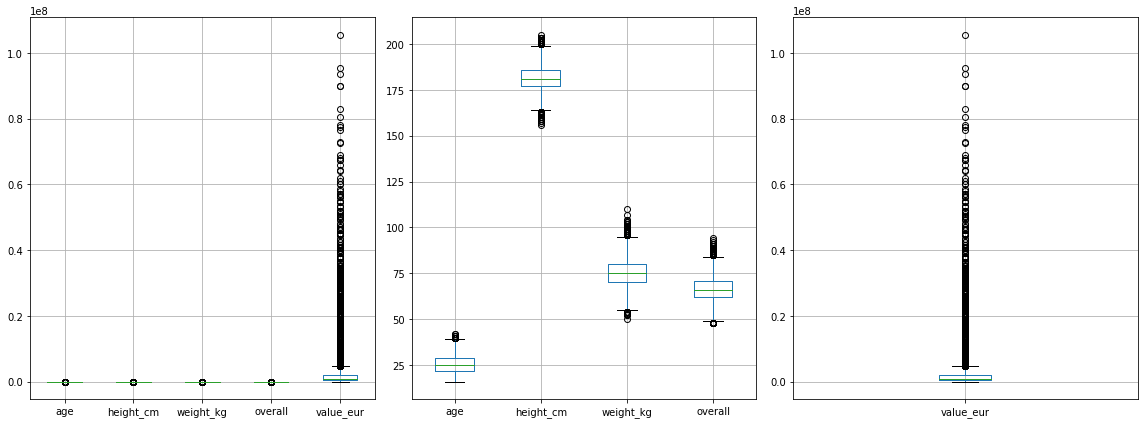

In [53]:
fig, ax = plt.subplots(figsize=(16, 6), ncols=3)
S.boxplot(ax=ax[0])
S[['age', 'height_cm', 'weight_kg', 'overall']].boxplot(ax=ax[1])
S[['value_eur']].boxplot(ax=ax[2])
plt.tight_layout()
plt.show()

In [55]:
N = S.select_dtypes(exclude='object')

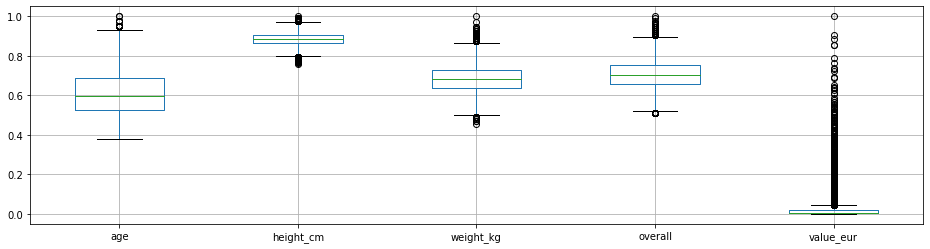

In [59]:
fig, ax = plt.subplots(figsize=(16, 4))
(N / N.max(axis=0)).boxplot(ax=ax)
plt.show()

### Check for unique values and group by

In [48]:
S.nationality.unique()

array(['Argentina', 'Portugal', 'Brazil', 'Slovenia', 'Belgium',
       'Germany', 'Netherlands', 'Croatia', 'Egypt', 'France', 'Senegal',
       'England', 'Spain', 'Italy', 'Uruguay', 'Poland', 'Denmark',
       'Gabon', 'Korea Republic', 'Costa Rica', 'Slovakia',
       'Bosnia Herzegovina', 'Serbia', 'Scotland', 'Hungary',
       'Switzerland', 'Greece', 'Austria', 'Morocco', 'Sweden', 'Wales',
       'Colombia', 'Czech Republic', 'Chile', 'Algeria', 'Ivory Coast',
       'Togo', 'Norway', 'Mexico', 'Iceland', 'Finland', 'Jamaica',
       'Albania', 'Guinea', 'Cameroon', 'Ghana', 'Montenegro', 'Ukraine',
       'Russia', 'DR Congo', 'Central African Rep.', 'Venezuela',
       'Nigeria', 'Armenia', 'Israel', 'Ecuador', 'Paraguay', 'Australia',
       'Turkey', 'Romania', 'Japan', 'Mali', 'United States', 'Kosovo',
       'Dominican Republic', 'Tanzania', 'China PR', 'Northern Ireland',
       'Republic of Ireland', 'Tunisia', 'Cape Verde', 'FYR Macedonia',
       'Burkina Faso', 'Ke

In [60]:
S.groupby('nationality').count()

,short_name,age,height_cm,weight_kg,club,overall,value_eur
nationality,,,,,,,
Afghanistan,2,2,2,2,2,2,2
Albania,43,43,43,43,43,43,43
Algeria,50,50,50,50,50,50,50
Angola,16,16,16,16,16,16,16
Antigua & Barbuda,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
Venezuela,66,66,66,66,66,66,66
Vietnam,1,1,1,1,1,1,1
Wales,117,117,117,117,117,117,117


In [67]:
S.groupby(['nationality', 'club']).agg(meanage=('age', 'mean'), sumvalue=('value_eur', 'sum'))

meanage  sumvalue
nationality club                                
Afghanistan SV Meppen             27.0    450000
            Stevenage             22.0    350000
Albania     1. FC Magdeburg       33.0    450000
            AC Ajaccio            23.0    950000
            AFC Wimbledon         21.0    200000
...                                ...       ...
Zimbabwe    Nottingham Forest     27.0   2400000
            Sparta Praha          33.0   1500000
            Stabæk Fotball        29.0    650000
            Stade de Reims        23.0    750000
            Yeni Malatyaspor      23.0    950000

[5284 rows x 2 columns]

In [84]:
A = S.groupby(['nationality', 'club']).agg(
    meanage=('age', 'mean'), sumvalue=('value_eur', 'sum'), count=('short_name', 'count'))

In [85]:
A.index

MultiIndex([('Afghanistan',              'SV Meppen'),
            ('Afghanistan',              'Stevenage'),
            (    'Albania',        '1. FC Magdeburg'),
            (    'Albania',             'AC Ajaccio'),
            (    'Albania',          'AFC Wimbledon'),
            (    'Albania',            'Albacete BP'),
            (    'Albania',               'Atalanta'),
            (    'Albania',        'Birmingham City'),
            (    'Albania',                'Brescia'),
            (    'Albania',         'CF Fuenlabrada'),
            ...
            (   'Zimbabwe',      'Charlton Athletic'),
            (   'Zimbabwe', 'Hamilton Academical FC'),
            (   'Zimbabwe',        'Helsingborgs IF'),
            (   'Zimbabwe',          'Kaizer Chiefs'),
            (   'Zimbabwe',            'Le Havre AC'),
            (   'Zimbabwe',      'Nottingham Forest'),
            (   'Zimbabwe',           'Sparta Praha'),
            (   'Zimbabwe',         'Stabæk Fotba

In [87]:
A.iloc[A.index.get_level_values('club') == 'Juventus']

,,meanage,sumvalue,count
nationality,club,,,
Argentina,Juventus,28.000000,111000000,2
Bosnia Herzegovina,Juventus,29.000000,42500000,1
Brazil,Juventus,26.000000,79000000,4
Colombia,Juventus,31.000000,22500000,1
Croatia,Juventus,28.500000,28000000,2
France,Juventus,25.333333,59000000,3
Germany,Juventus,28.500000,42500000,2
Italy,Juventus,27.333333,150475000,12
Netherlands,Juventus,19.000000,50000000,1


#### Check the following, what's wrong?

In [93]:
E = S.groupby(['short_name', 'club']).agg(
    meanage=('age', 'mean'), sumvalue=('value_eur', 'sum'), count=('short_name', 'count'))

## Visualize

In [150]:
X = S.sort_values(by='value_eur', ascending=True)

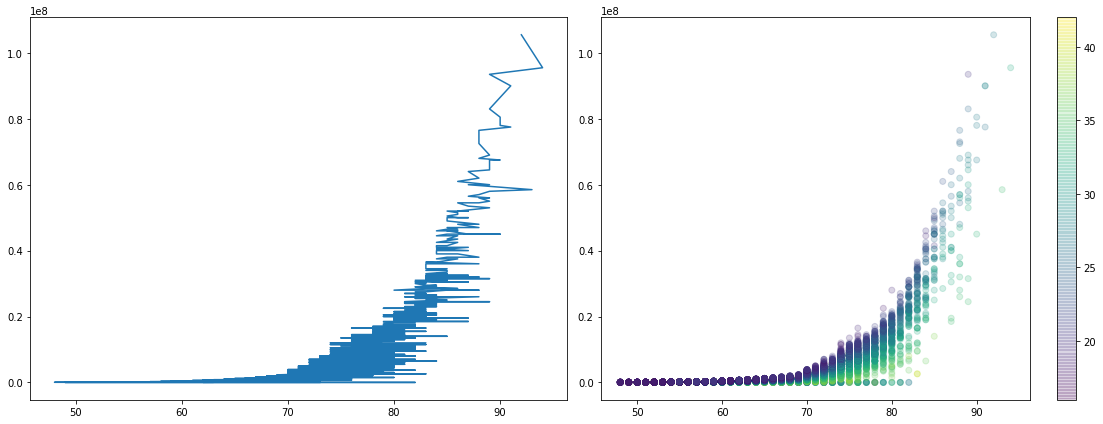

In [158]:
fig, ax = plt.subplots(figsize=(16, 6), nrows=1, ncols=2)
ax[0].plot(X.overall.values, X.value_eur.values)
im = ax[1].scatter(X.overall.values, X.value_eur.values, alpha=0.2, c=X.age)
fig.colorbar(im)
plt.tight_layout()
plt.show()

## Correlation

In [117]:
N.corr()

,age,height_cm,weight_kg,overall,value_eur
age,1.000000,0.081391,0.237169,0.464305,0.081513
height_cm,0.081391,1.000000,0.768816,0.039945,0.009527
weight_kg,0.237169,0.768816,1.000000,0.156522,0.051782
overall,0.464305,0.039945,0.156522,1.000000,0.638230
value_eur,0.081513,0.009527,0.051782,0.638230,1.000000


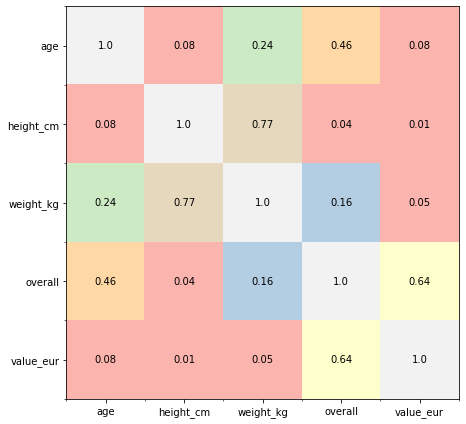

In [142]:
K = N.corr()
fig, ax = plt.subplots(figsize=(16, 6), ncols=1)
ax.imshow(K, cmap='Pastel1')
for i in range(K.shape[0]):
    for j in range(K.shape[1]):
        text = ax.text(i, j, round(K.iloc[i][j], 2),
                       ha="center", va="center", color="#000000")
ax.set_xticks(np.arange(K.shape[0] + 1) - .5, minor=True)
ax.set_xticklabels([None] + list(K.index))
ax.set_yticks(np.arange(K.shape[1] + 1) - .5, minor=True)
ax.set_yticklabels([None] + list(K.columns))

plt.tight_layout()
plt.show()

In [144]:
import seaborn as sns

/Users/alfio/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/alfio/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


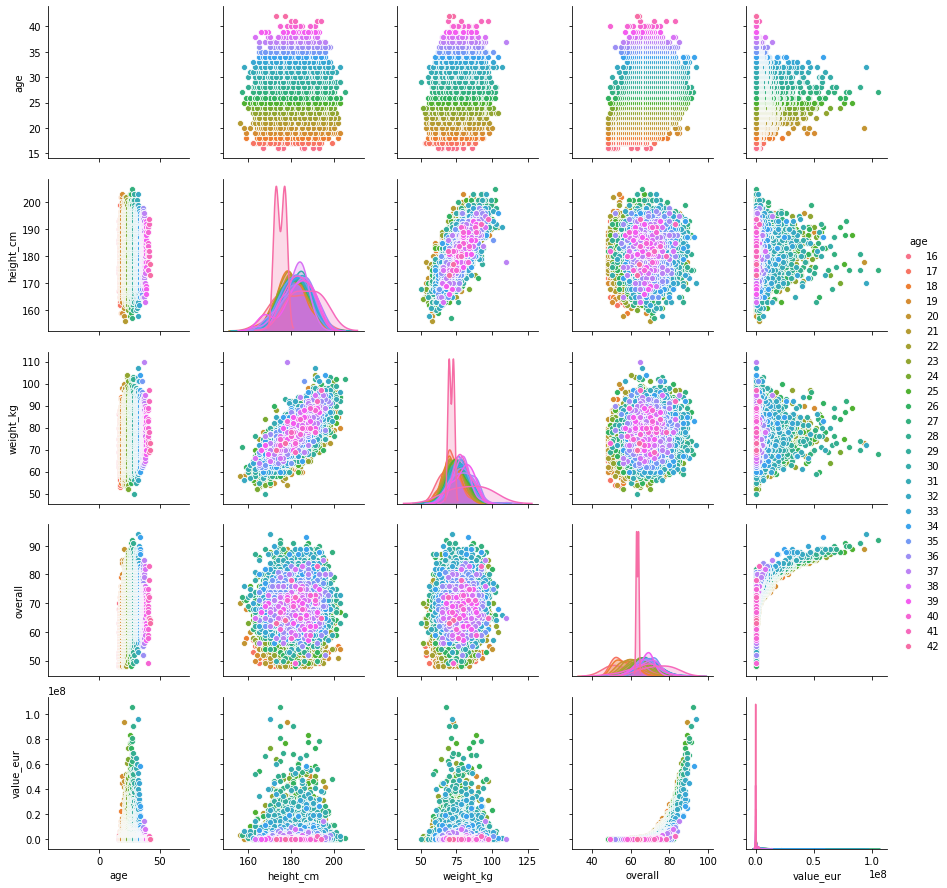

In [148]:
sns.pairplot(N, hue='age')
plt.show()